# 시계열 수치입력 수치 예측 모델(다층 퍼셉트론)
- 시계열 수치를 입력해서 다음 수치를 예측하는 모델
- 각 모델에 코사인(cosine) 데이터를 학습시킨 후, 처음 일부 데이터를 알려주면 이후 코사인 형태의 데이터 예측을 얼마나 잘 하는 지 테스트

### 사용할 패키지 불러오기 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### 데이터셋 만들기 
- 생성한 코사인 데이터를 모델에 학습시키기 위해서는 데이터와 라벨로 구성된 데이터셋으로 만들기 
- 이전 수치들을 입력하여 다음 수치를 예측하는 문제
    - 데이터는 이전 수치
    - 라벨은 다음 수치
- 다른 예제들과는 달리 데이터와 라벨이 모두 같은 속성
- create_dataset() 함수는 시계열 수치를 입력받아 데이터셋을 생성
    - look_back 인자는 얼마만큼의 이전 수치를 데이터로 만들것인가를 결정

In [2]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
look_back = 40

### 1 데이터 셋 생성하기 
* 시간의 흐름에 따라 진폭이 -1.0에서 1.0사이로 변하는 1,600개의 실수값을 생성

In [4]:
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

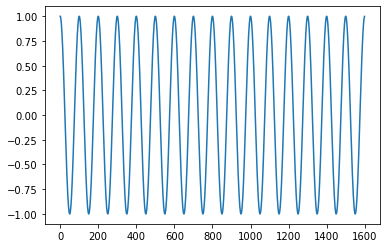

In [5]:
%matplotlib inline

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

#### 데이터 전처리

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

#### 데이터 분리

In [7]:
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

#### 데이터셋 생성

In [8]:
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

#### 데이터셋 전처리

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### 2 모델 구성하기 
- LSTM 
    - Long-Short Term Memory unit의 약자로 순환 신경망 레이어 중 하나
- tanh
    - LSTM의 출력 활성화 함수로 사용

In [10]:
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기

In [11]:
model.compile(loss='mean_squared_error', optimizer='adam')

### 4. 모델 학습시키기

In [12]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/200
24/24 [==============================] - 0s 15ms/step - loss: 0.1584 - val_loss: 0.0436
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0437 - val_loss: 0.0217
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0104
Epoch 4/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0030
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0119 - val_loss: 8.5498e-04
Epoch 6/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 5.4195e-04
Epoch 7/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.0011
Epoch 8/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 5.4063e-04
Epoch 9/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 8.3050e-04
Epoch 10/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss:

24/24 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 8.7885e-05
Epoch 81/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 4.7138e-04
Epoch 82/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 3.8458e-04
Epoch 83/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 3.1248e-04
Epoch 84/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 2.3566e-04
Epoch 85/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 2.3127e-04
Epoch 86/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 2.3167e-05
Epoch 87/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 1.6924e-04
Epoch 88/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 9.0480e-04
Epoch 89/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0

24/24 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 1.5886e-04
Epoch 159/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 6.5065e-05
Epoch 160/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 2.3966e-04
Epoch 161/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 5.7566e-05
Epoch 162/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 1.0464e-04
Epoch 163/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 3.6541e-05
Epoch 164/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 9.2835e-05
Epoch 165/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 1.1655e-04
Epoch 166/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 8.9130e-05
Epoch 167/200
24/24 [==============================] - 0s 4ms/step - 

### 5. 학습과정 살펴보기

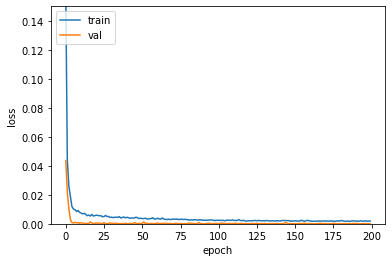

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()          

### 6. 모델 평가하기

In [14]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Train Score:  7.889690095908009e-06
Validataion Score:  7.845652362448163e-06
Test Score:  7.845652362448163e-06


### 7. 모델 사용하기

In [17]:
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):    
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])

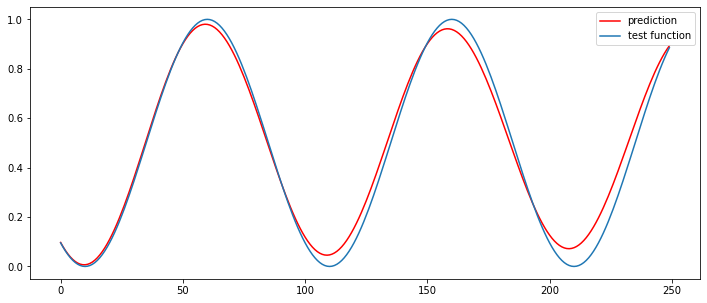

In [18]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()